In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
#import celltypist
#import scvi
#import scvelo as scv
#from celltypist import models
import seaborn as sns

from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

version = '2023-05-16'

sc.settings.figdir = './scanpy/{}/graph'.format(version)
sc.settings.cachedir = './scanpy/{}/cache'.format(version)
%config InlineBackend.figure_format = 'retina'

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.7


# Import data

In [2]:
adata_MC = sc.read('./write/MC_leiden.h5ad')
adata_MC.uns['log1p']["base"] = None
adata_MC

AnnData object with n_obs × n_vars = 33577 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Minor_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spli

In [6]:
adata_MC.obs['Major_cluster'].unique().tolist()

['Monocytes',
 'NK cells',
 'T cells',
 'Megakaryocytes',
 'B cells',
 'Neutrophils',
 'DC2',
 'Neutrophil-myeloid progenitor',
 'HSC/MPP']

# Mono sub-clustering

In [3]:
adata_MC_Mono = adata_MC[adata_MC.obs['Major_cluster'].isin(['Monocytes'])]
adata_MC_Mono.obs

initial_size_spliced  initial_size_unspliced  \
AAACCTGAGAATGTGT-0                   526                     591   
AAACCTGAGCGCCTCA-0                   257                     624   
AAACCTGAGGCTAGCA-0                   268                     518   
AAACCTGAGGTGGGTT-0                   488                     865   
AAACCTGCACAAGTAA-0                   447                     624   
...                                  ...                     ...   
TTTGTCAGTTCGAATC-3                   292                     536   
TTTGTCAGTTGTGGCC-3                   542                     763   
TTTGTCATCGGGAGTA-3                   284                     613   
TTTGTCATCTAACTCT-3                   271                     412   
TTTGTCATCTTGTTTG-3                   783                    1157   

                    initial_size     Phenotype   donor_id batch  n_genes  \
AAACCTGAGAATGTGT-0         526.0     MG_crisis  Patient_1     0     2267   
AAACCTGAGCGCCTCA-0         257.0     MG_crisis  Patient_1     0     2102   
AAACCTGAGGCTAGCA-0         268.0     MG_crisis  Patient_1     0     1953   
AAACCTGAGGTGGGTT-0         488.0     MG_crisis  Patient_1     0     2766   
AAACCTGCACAAGTAA-0         447.0     MG_crisis  Patient_1     0     2271   
...                          ...           ...        ...   ...      ...   
TTTGTCAGTTCGAATC-3         292.0  After_crisis  Patient_2     3     1763   
TTTGTCAGTTGTGGCC-3         542.0  After_crisis  Patient_2     3     2657   
TTTGTCATCGGGAGTA-3         284.0  After_crisis  Patient_2     3     1971   
TTTGTCATCTAACTCT-3         271.0  After_crisis  Patient_2     3     1273   
TTTGTCATCTTGTTTG-3         783.0  After_crisis  Patient_2     3     2824   

                    n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGAGAATGTGT-0               2266        7739.0             58.0   
AAACCTGAGCGCCTCA-0               2102        6523.0             58.0   
AAACCTGAGGCTAGCA-0               1953        4736.0             43.0   
AAACCTGAGGTGGGTT-0               2766        9678.0            103.0   
AAACCTGCACAAGTAA-0               2271        6289.0             72.0   
...                               ...           ...              ...   
TTTGTCAGTTCGAATC-3               1763        5402.0             59.0   
TTTGTCAGTTGTGGCC-3               2657        9459.0             91.0   
TTTGTCATCGGGAGTA-3               1971        7129.0             61.0   
TTTGTCATCTAACTCT-3               1273        2822.0             63.0   
TTTGTCATCTTGTTTG-3               2824       11293.0             68.0   

                    pct_counts_mt predicted_labels_NC2022  \
AAACCTGAGAATGTGT-0       0.749451         Monocyte (CD14)   
AAACCTGAGCGCCTCA-0       0.889161         Monocyte (CD16)   
AAACCTGAGGCTAGCA-0       0.907939         Monocyte (CD14)   
AAACCTGAGGTGGGTT-0       1.064269         Monocyte (CD14)   
AAACCTGCACAAGTAA-0       1.144856         Monocyte (CD14)   
...                           ...                     ...   
TTTGTCAGTTCGAATC-3       1.092188      Memory B cell (II)   
TTTGTCAGTTGTGGCC-3       0.962047         Monocyte (CD14)   
TTTGTCATCGGGAGTA-3       0.855660         Monocyte (CD14)   
TTTGTCATCTAACTCT-3       2.232459         Monocyte (CD14)   
TTTGTCATCTTGTTTG-3       0.602143                    cDC2   

                   majority_voting_NC2022 predicted_labels_builtin  \
AAACCTGAGAATGTGT-0        Monocyte (CD14)      Classical monocytes   
AAACCTGAGCGCCTCA-0        Monocyte (CD14)      Classical monocytes   
AAACCTGAGGCTAGCA-0        Monocyte (CD14)      Classical monocytes   
AAACCTGAGGTGGGTT-0        Monocyte (CD14)      Classical monocytes   
AAACCTGCACAAGTAA-0        Monocyte (CD14)      Classical monocytes   
...                                   ...                      ...   
TTTGTCAGTTCGAATC-3        Monocyte (CD14)      Classical monocytes   
TTTGTCAGTTGTGGCC-3        Monocyte (CD14)      Classical monocytes   
TTTGTCATCGGGAGTA-3        Monocyte (CD14)      Classical monoc

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\tools\_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


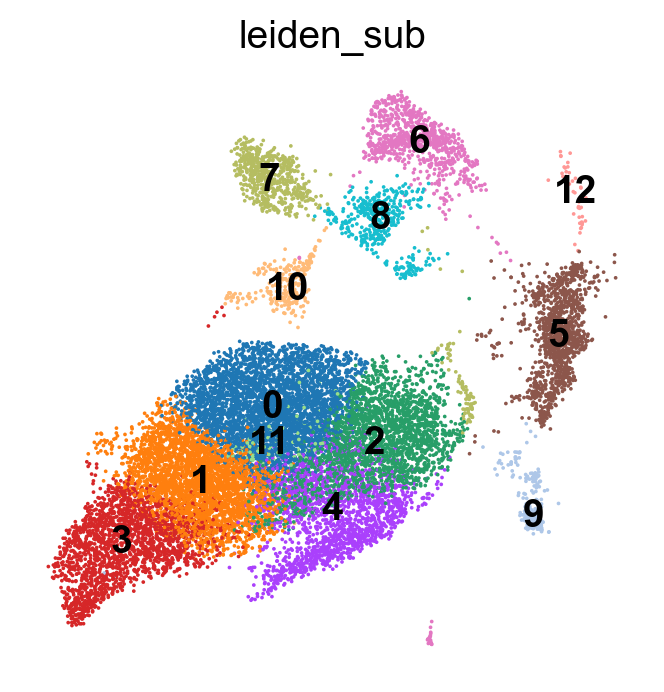

In [4]:
sc.tl.leiden(adata_MC_Mono, key_added = "leiden_sub", resolution=0.5) 
sc.pl.umap(adata_MC_Mono, color='leiden_sub', legend_loc = 'on data')

categories: 0, 1, 2, etc.
var_group_labels: Monocytes, Monocytes 1, Monocytes 2, etc.


c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


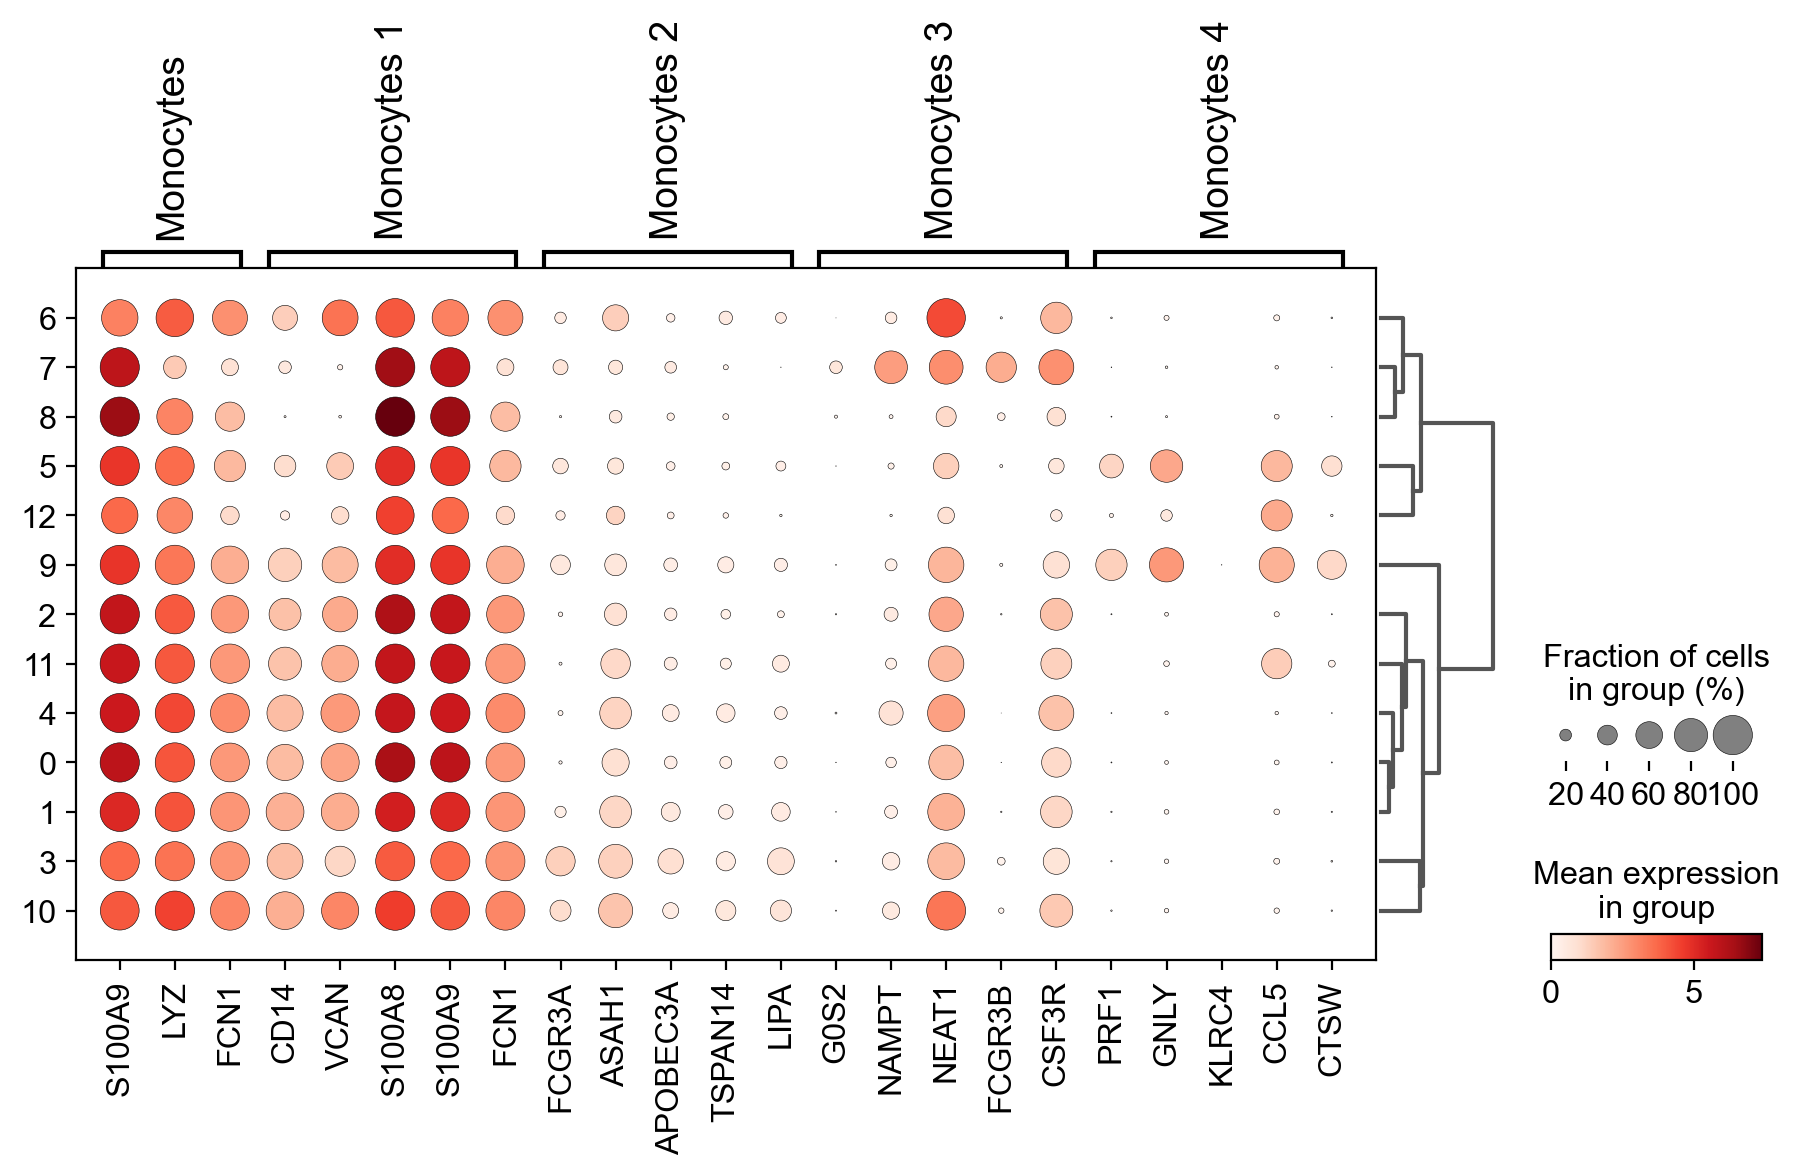

In [17]:
marker_genes_dict = {
    'Monocytes': ['S100A9', 'LYZ', 'FCN1'],
    'Monocytes 1': ['CD14', 'VCAN', 'S100A8', 'S100A9', 'FCN1'],
    'Monocytes 2': ['FCGR3A', 'ASAH1', 'APOBEC3A', 'TSPAN14', 'LIPA'],
    'Monocytes 3': ['G0S2', 'NAMPT', 'NEAT1', 'FCGR3B', 'CSF3R', ], #'TREM1', 'TNFRSF10C', 'CXCR2'
    'Monocytes 4': ['PRF1', 'GNLY', 'KLRC4', 'CCL5', 'CTSW'],
    #'Macrophages': ['C1QA', 'CD68', 'TREM2']
}
sc.tl.dendrogram(adata_MC_Mono, groupby='leiden_sub')
sc.pl.dotplot(adata_MC_Mono, marker_genes_dict, groupby='leiden_sub', dendrogram=True, save='Mono marker gene')

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


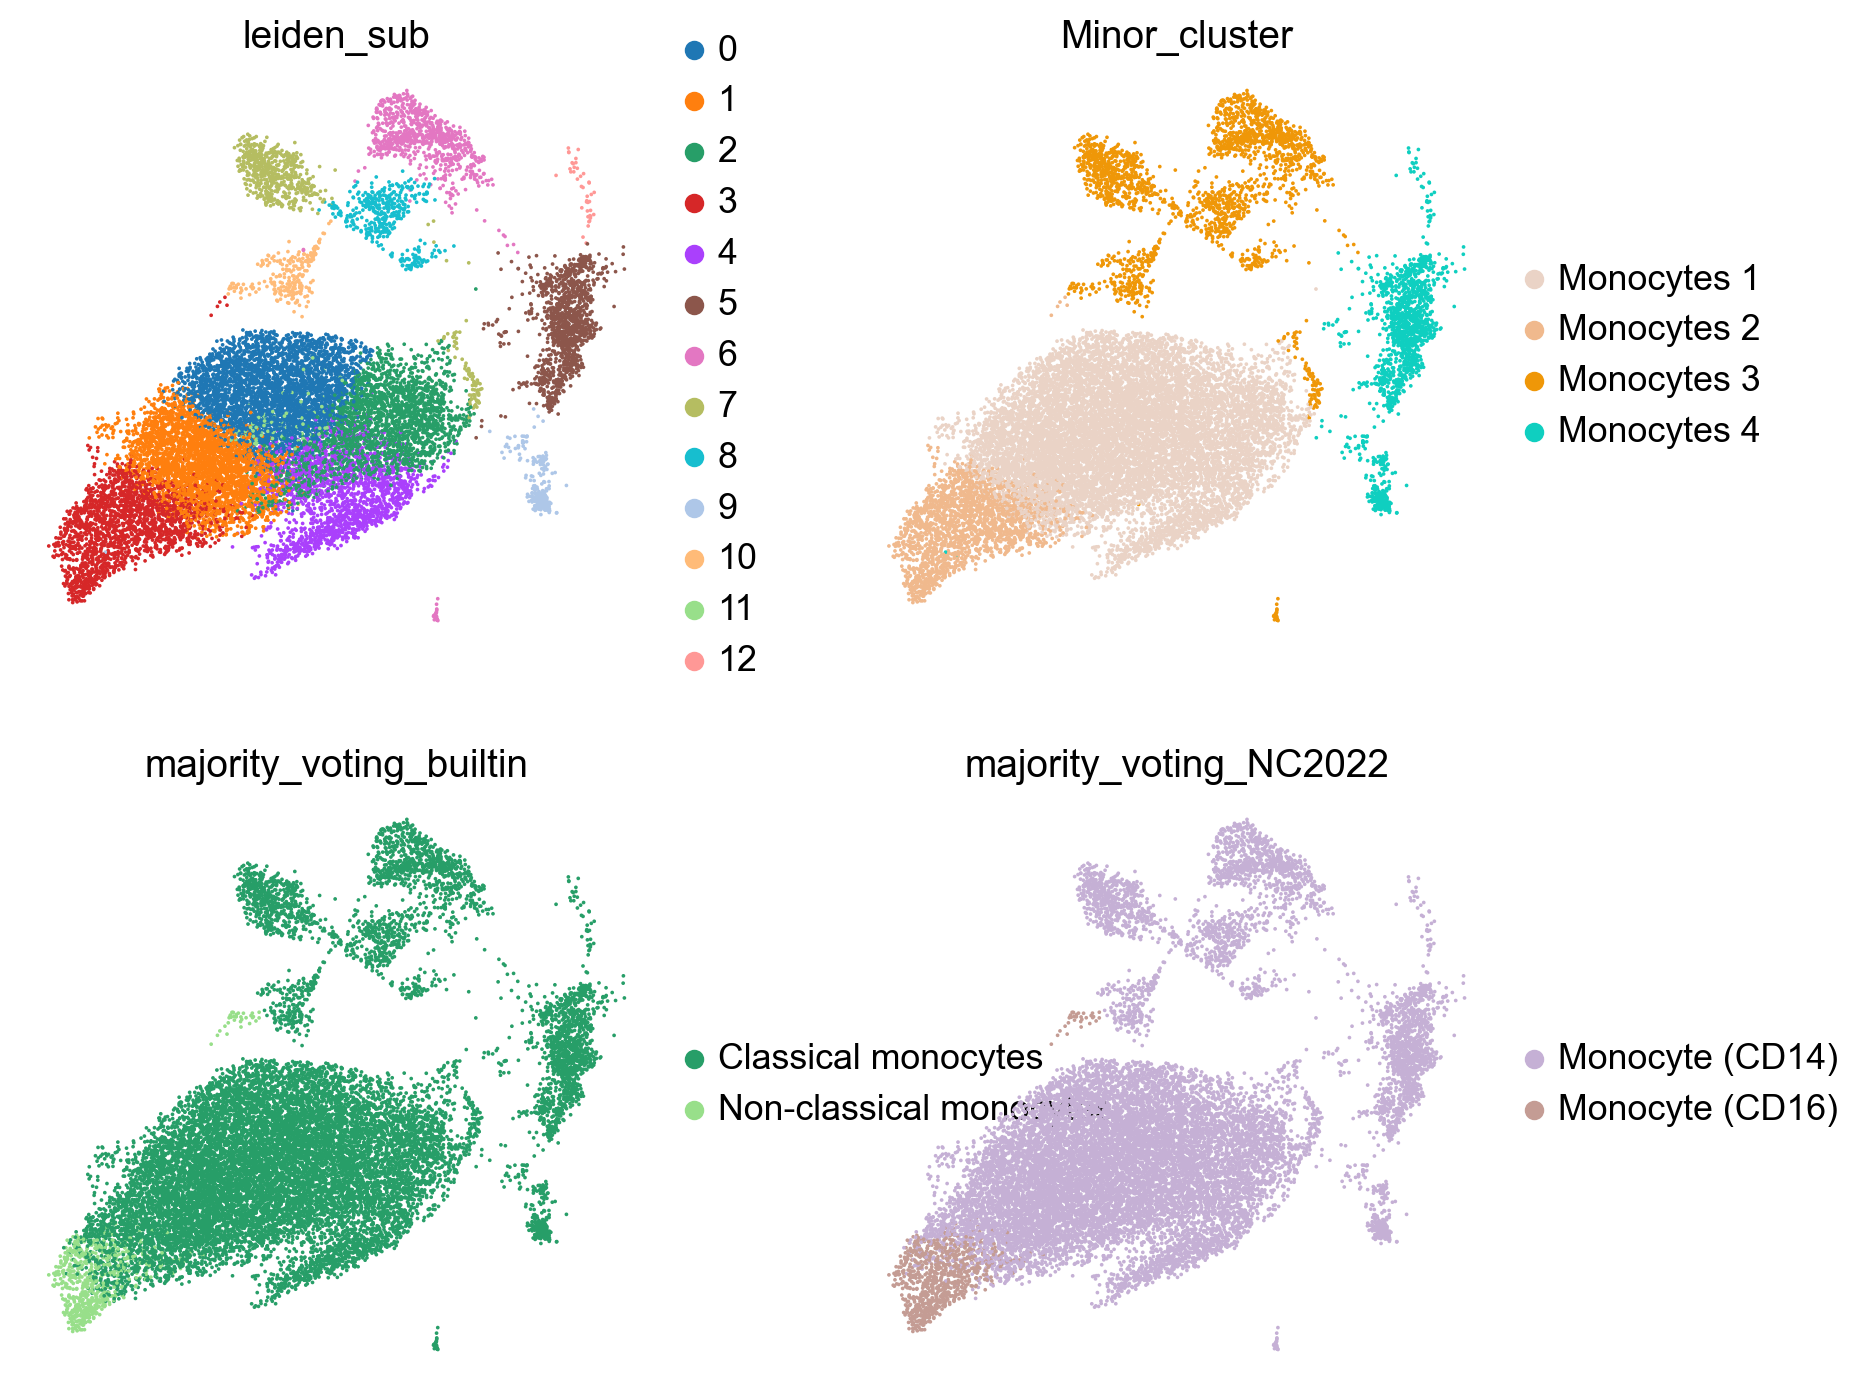

In [5]:
mapping = {
        '0': 'Monocytes 1',
        '1': 'Monocytes 1',
        '2': 'Monocytes 1',
        '3': 'Monocytes 2',
        '4': 'Monocytes 1',
        '5': 'Monocytes 4',
        '6': 'Monocytes 3',
        '7': 'Monocytes 3',
        '8': 'Monocytes 3',
        '9': 'Monocytes 4',
        '10': 'Monocytes 3',
        '11': 'Monocytes 1',
        '12': 'Monocytes 4',
    }
    
adata_MC_Mono.obs['Minor_cluster'] = adata_MC_Mono.obs['leiden_sub'].map(mapping)

sc.pl.umap(adata_MC_Mono, color=['leiden_sub', 'Minor_cluster', 'majority_voting_builtin', 'majority_voting_NC2022'], ncols=2)

In [31]:
adata_MC_Mono

adata_MC_Mono3 = adata_MC_Mono[adata_MC_Mono.obs['Minor_cluster'].isin(['Monocytes 3'])]
adata_MC_Mono3

View of AnnData object with n_obs × n_vars = 1736 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'leiden_sub', 'Minor_cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'dendrogram_leiden_sub', 'Minor_cluster_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spliced', 'unsplic

categories: Monocytes 1, Monocytes 2, Monocytes 3, etc.
var_group_labels: Monocytes, Monocytes 1, Monocytes 2, etc.


c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


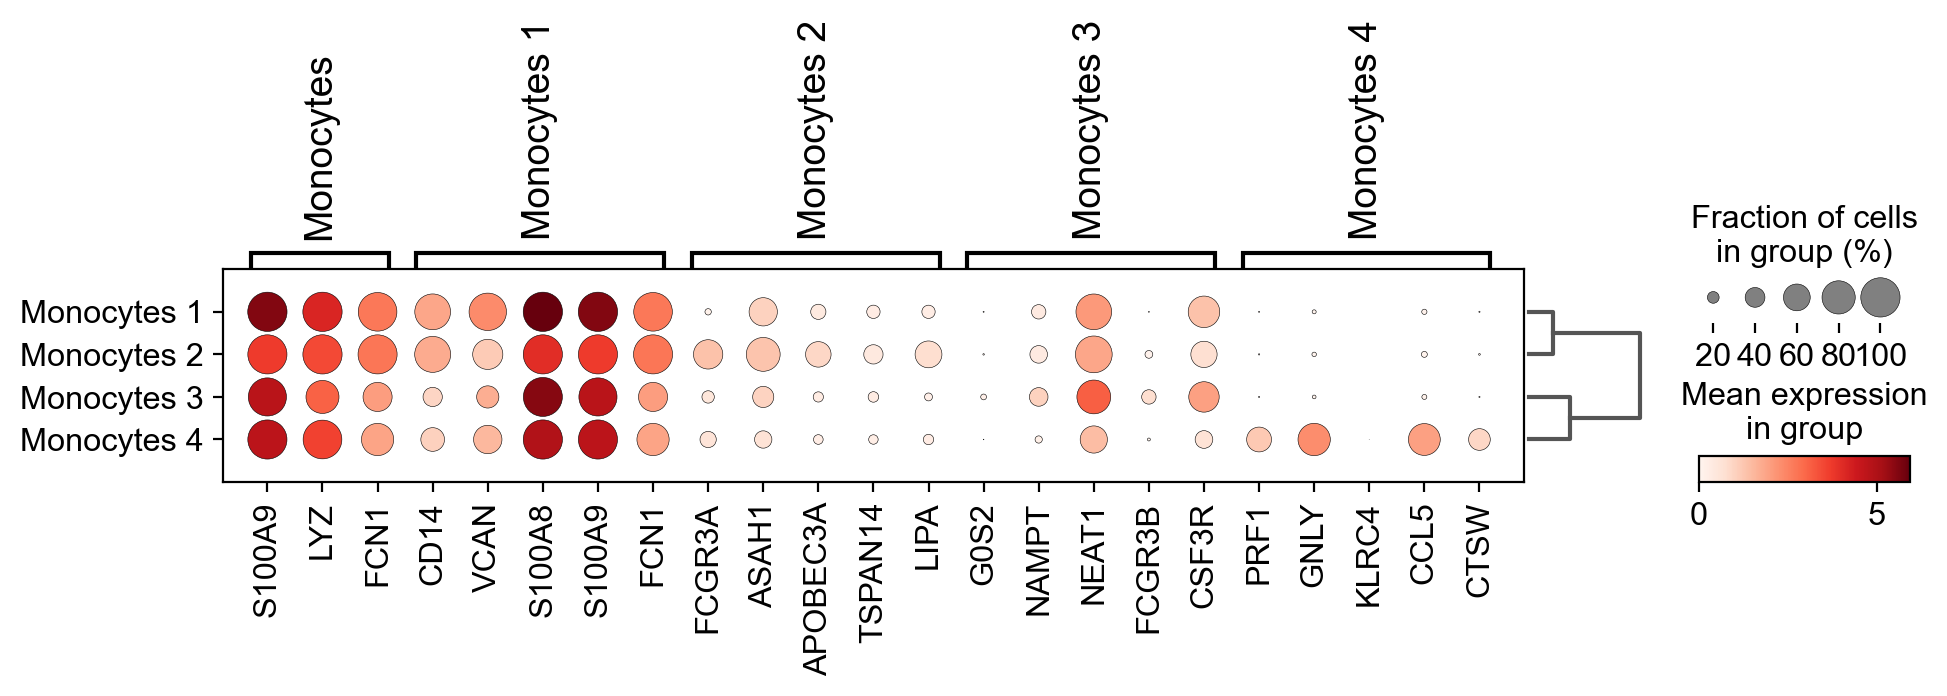

In [29]:
marker_genes_dict = {
    'Monocytes': ['S100A9', 'LYZ', 'FCN1'],
    'Monocytes 1': ['CD14', 'VCAN', 'S100A8', 'S100A9', 'FCN1'],
    'Monocytes 2': ['FCGR3A', 'ASAH1', 'APOBEC3A', 'TSPAN14', 'LIPA'],
    'Monocytes 3': ['G0S2', 'NAMPT', 'NEAT1', 'FCGR3B', 'CSF3R', ], #'TREM1', 'TNFRSF10C', 'CXCR2'
    'Monocytes 4': ['PRF1', 'GNLY', 'KLRC4', 'CCL5', 'CTSW'],
    #'Macrophages': ['C1QA', 'CD68', 'TREM2']
}

sc.pl.dotplot(adata_MC_Mono, marker_genes_dict, groupby='Minor_cluster', dendrogram=True, save='hmono marker gene')

In [7]:
adata_MC_Mono.obs.to_csv('adata_MC_Mono.obs.csv')

# T sub-clustering

In [4]:
adata_MC_T = adata_MC[adata_MC.obs['Major_cluster'].isin(['T cells'])]
adata_MC_T

View of AnnData object with n_obs × n_vars = 10077 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


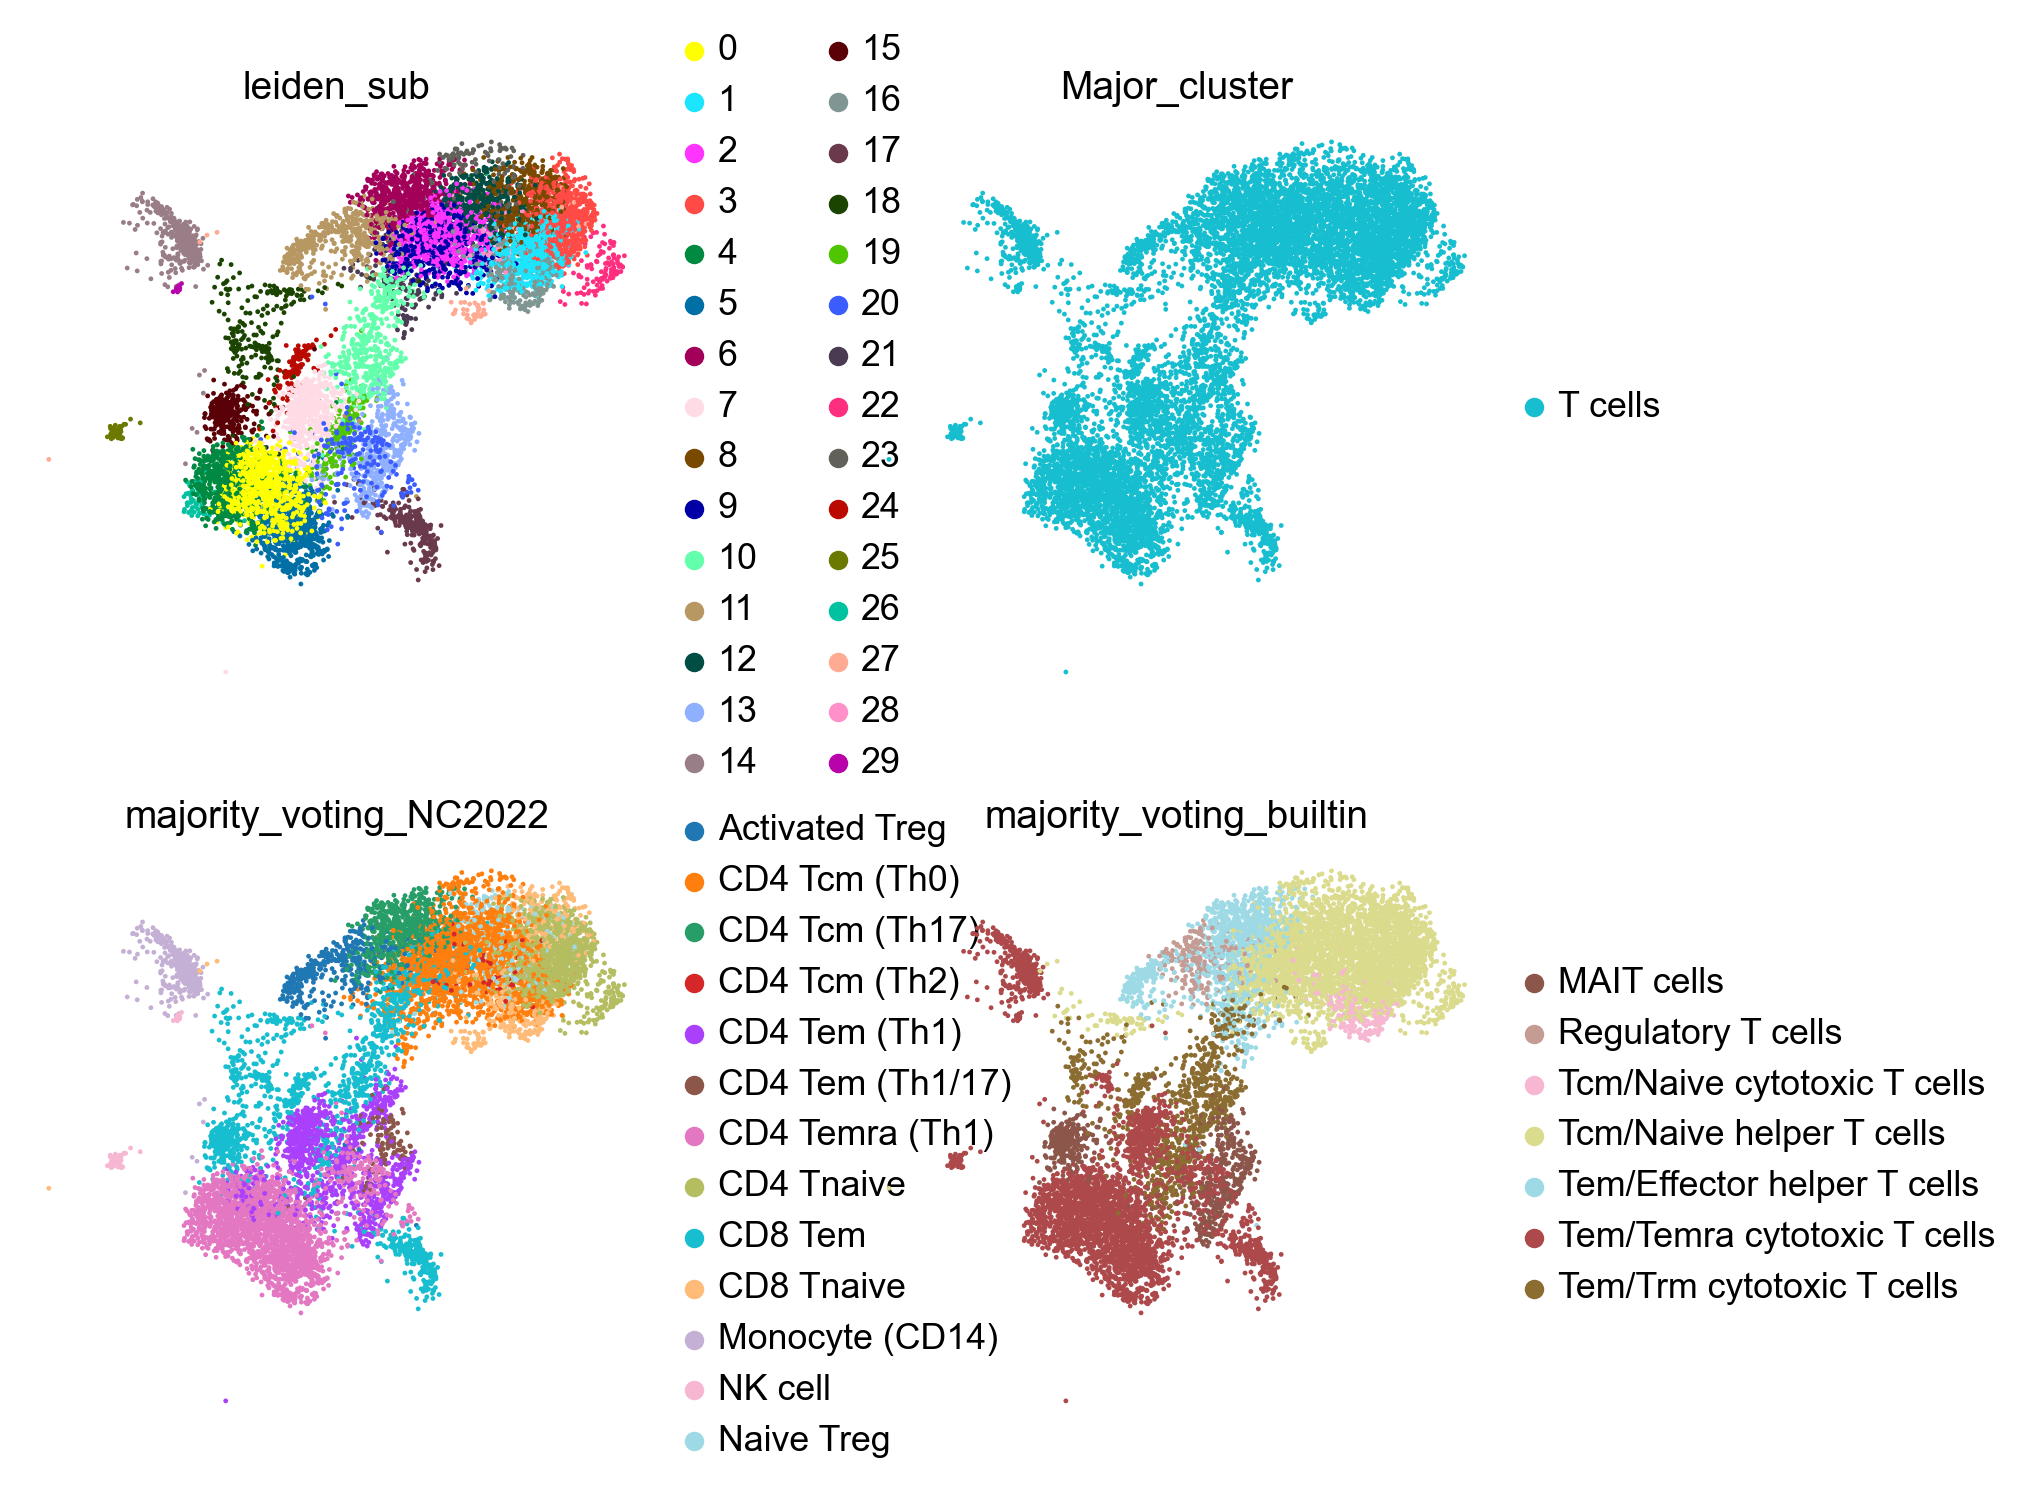

In [6]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)

sc.tl.leiden(adata_MC_T, key_added = "leiden_sub", resolution=2) 
sc.pl.umap(adata_MC_T, color=['leiden_sub', 'Major_cluster', 'majority_voting_NC2022', 'majority_voting_builtin'], ncols=2)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


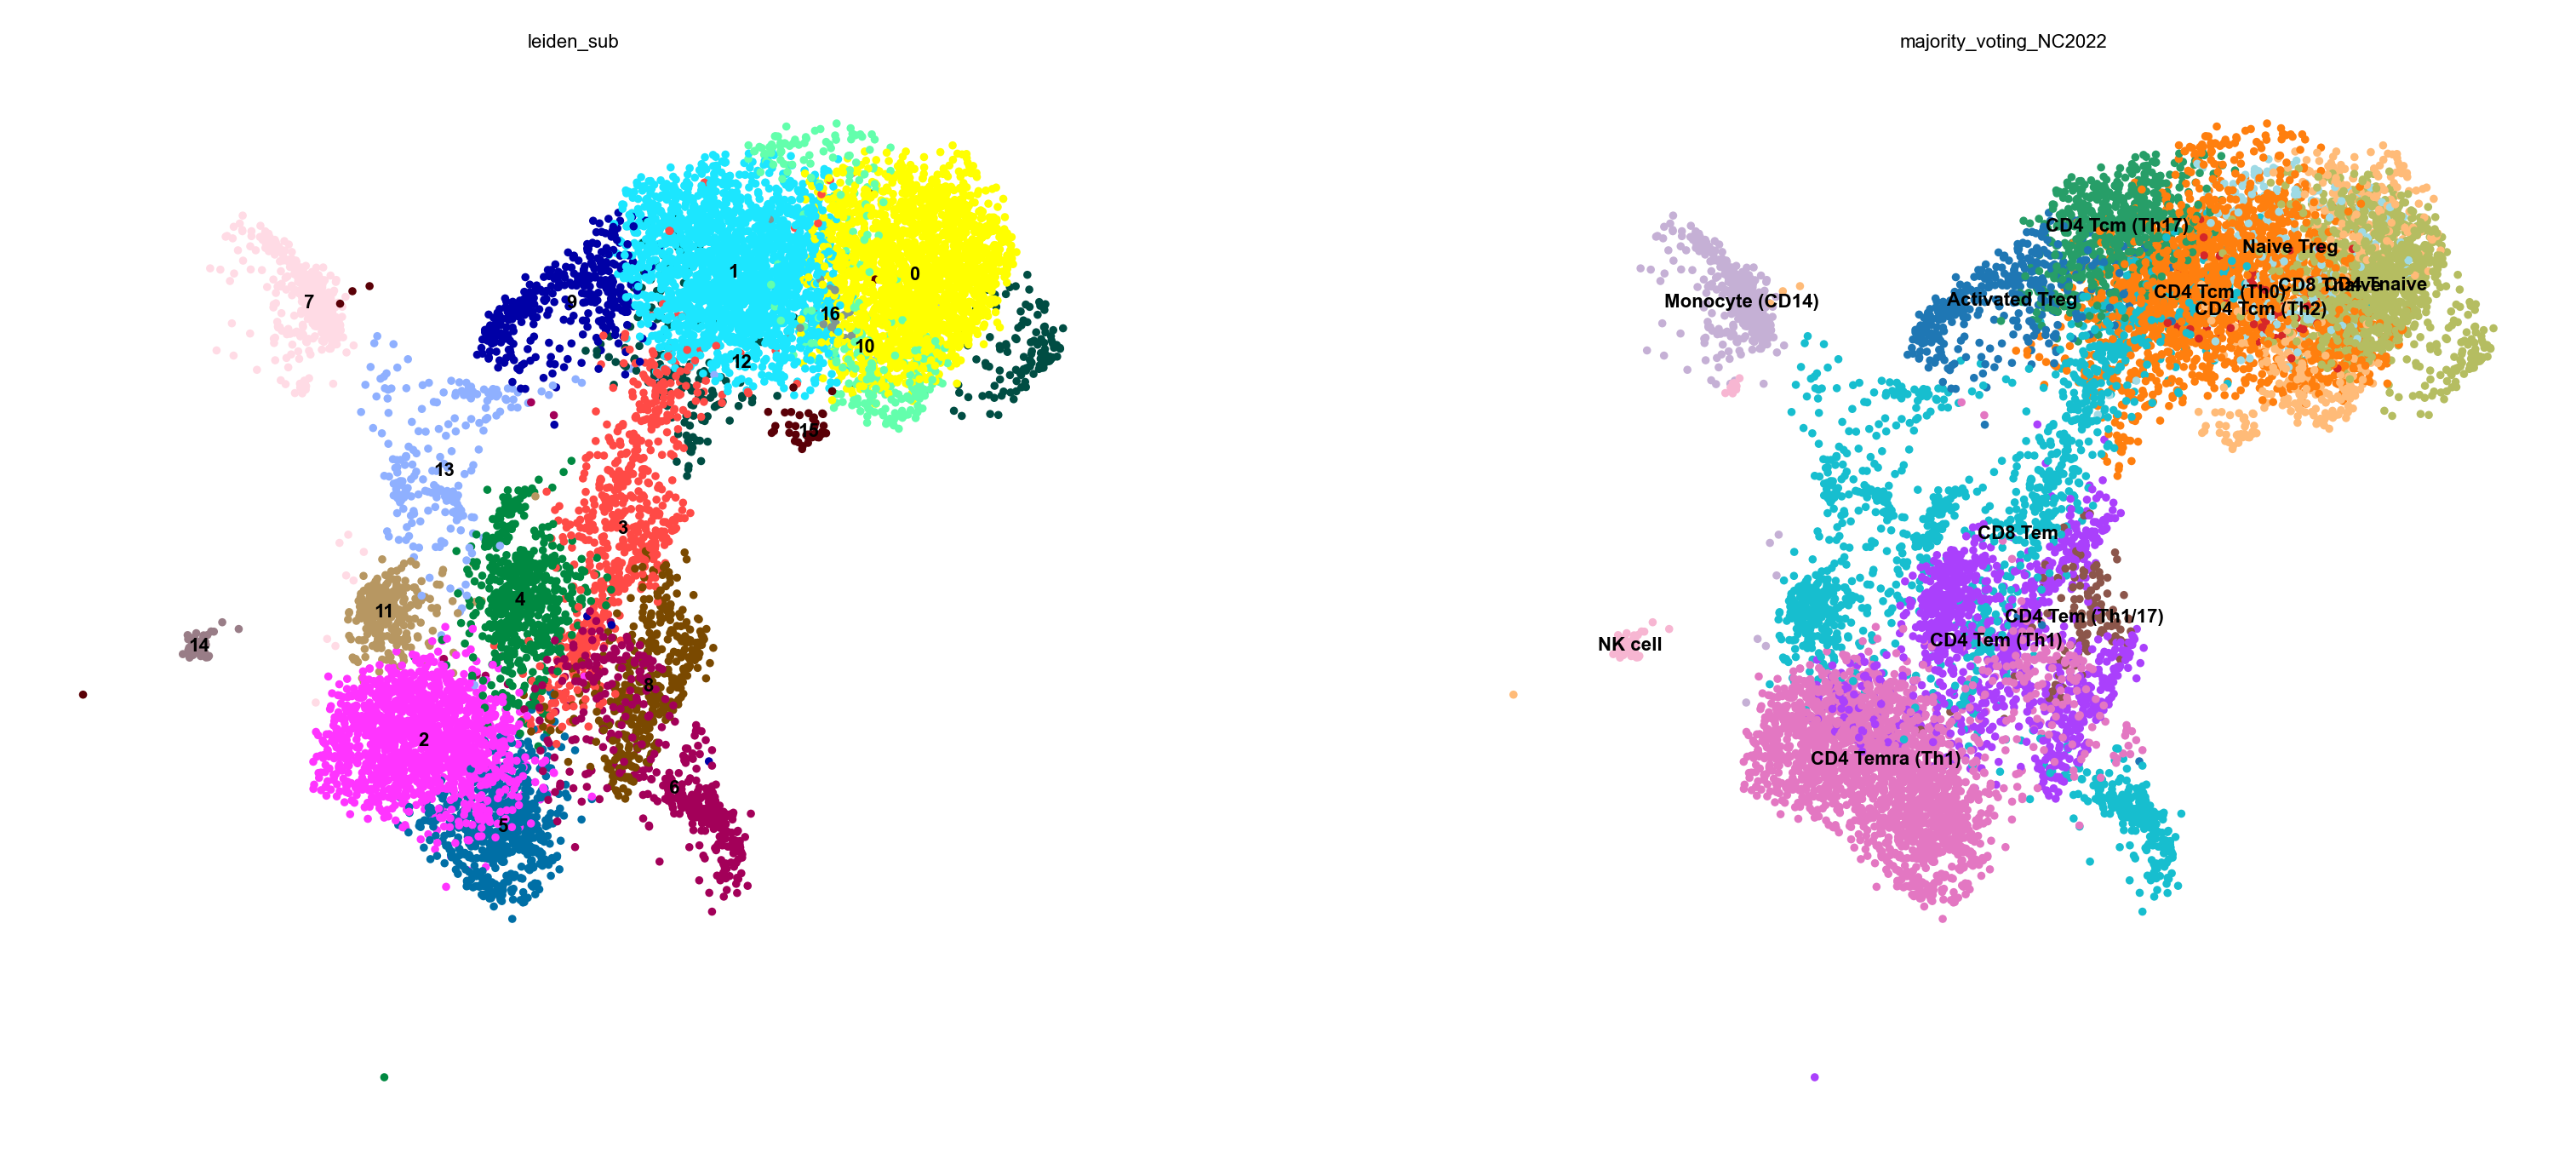

In [13]:
sc.set_figure_params(dpi=200, color_map = 'viridis_r', fontsize=4, transparent=False, frameon=False)

sc.tl.leiden(adata_MC_T, key_added = "leiden_sub", resolution=1) 
sc.pl.umap(adata_MC_T, color=['leiden_sub', 'majority_voting_NC2022'], legend_loc = 'on data')

categories: 0, 1, 2, etc.
var_group_labels: CD8 Tnaive, CD8 Tem, CD8 Trm, etc.


c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


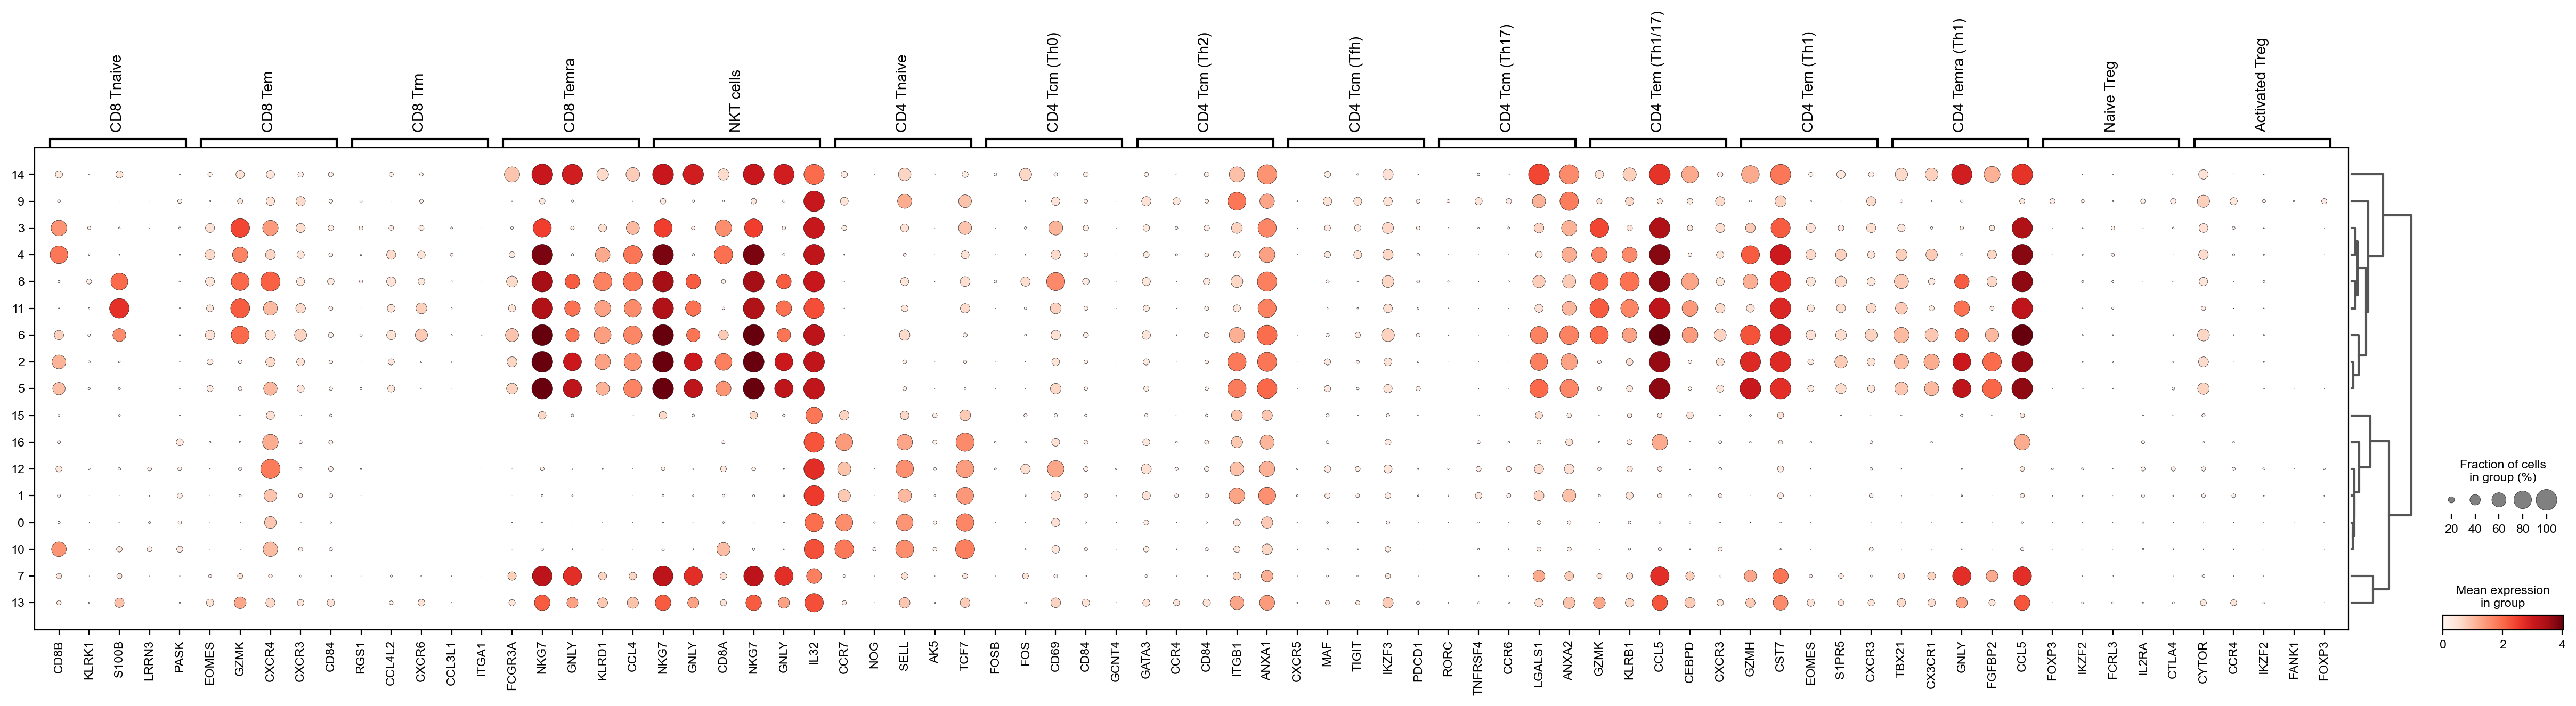

In [17]:
# T NC2022 version

sc.set_figure_params(dpi=100, color_map = 'viridis_r', fontsize=10, transparent=False, frameon=False)

marker_genes_dict = {

    'CD8 Tnaive':	['CD8B', 'KLRK1', 'S100B', 'LRRN3', 'PASK'],
    'CD8 Tem':	['EOMES', 'GZMK', 'CXCR4', 'CXCR3', 'CD84'],
    'CD8 Trm':	['RGS1', 'CCL4L2', 'CXCR6', 'CCL3L1', 'ITGA1'],
    'CD8 Temra':	['FCGR3A', 'NKG7', 'GNLY', 'KLRD1', 'CCL4'],
    'NKT cells': ['NKG7', 'GNLY', 'CD8A', 'NKG7', 'GNLY', 'IL32'],
    'CD4 Tnaive':	['CCR7',	'NOG',	'SELL',	'AK5',	'TCF7'],
    'CD4 Tcm (Th0)':	['FOSB',	'FOS',	'CD69',	'CD84',	'GCNT4'],
    'CD4 Tcm (Th2)':	['GATA3',	'CCR4',	'CD84',	'ITGB1',	'ANXA1'],
    'CD4 Tcm (Tfh)':	['CXCR5',	'MAF',	'TIGIT',	'IKZF3',	'PDCD1'],
    'CD4 Tcm (Th17)':	['RORC',	'TNFRSF4',	'CCR6',	'LGALS1',	'ANXA2'],
    'CD4 Tem (Th1/17)':	['GZMK',	'KLRB1',	'CCL5',	'CEBPD',	'CXCR3'],
    'CD4 Tem (Th1)':	['GZMH',	'CST7',	'EOMES',	'S1PR5',	'CXCR3'],
    'CD4 Temra (Th1)':	['TBX21',	'CX3CR1',	'GNLY',	'FGFBP2',	'CCL5'],
    'Naive Treg':	['FOXP3',	'IKZF2',	'FCRL3',	'IL2RA',	'CTLA4'],
    'Activated Treg':	['CYTOR',	'CCR4',	'IKZF2',	'FANK1',	'FOXP3'],
}

sc.tl.dendrogram(adata_MC_T,  groupby='leiden_sub')
sc.pl.dotplot(adata_MC_T, marker_genes_dict, groupby='leiden_sub', dendrogram=True, save='huan T marker gene NC ')

In [18]:
adata_MC_T.obs['majority_voting_NC2022'].unique().tolist()

['CD8 Tem',
 'CD4 Temra (Th1)',
 'CD4 Tcm (Th0)',
 'CD4 Tcm (Th17)',
 'Activated Treg',
 'CD4 Tnaive',
 'CD8 Tnaive',
 'Monocyte (CD14)',
 'Naive Treg',
 'CD4 Tcm (Th2)',
 'NK cell',
 'CD4 Tem (Th1)',
 'CD4 Tem (Th1/17)']

In [22]:
adata_MC_T.obs['Minor_cluster'] = adata_MC_T.obs['majority_voting_NC2022'].copy()

adata_MC_T.obs

initial_size_spliced  initial_size_unspliced  \
AAACCTGAGTGTGAAT-0                   157                     243   
AAACCTGGTTGTACAC-0                   164                     474   
AAACCTGTCAGCGATT-0                   188                     313   
AAACCTGTCCAATGGT-0                   431                     517   
AAACCTGTCCCAAGTA-0                   190                     311   
...                                  ...                     ...   
TTTGTCAAGAAGATTC-3                   187                     300   
TTTGTCAAGGTGGGTT-3                   304                     396   
TTTGTCACAAGAAGAG-3                   223                     334   
TTTGTCAGTTATCCGA-3                   314                     486   
TTTGTCATCAACACTG-3                   278                     554   

                    initial_size     Phenotype   donor_id batch  n_genes  \
AAACCTGAGTGTGAAT-0         157.0     MG_crisis  Patient_1     0     1190   
AAACCTGGTTGTACAC-0         164.0     MG_crisis  Patient_1     0     1920   
AAACCTGTCAGCGATT-0         188.0     MG_crisis  Patient_1     0     1449   
AAACCTGTCCAATGGT-0         431.0     MG_crisis  Patient_1     0     1989   
AAACCTGTCCCAAGTA-0         190.0     MG_crisis  Patient_1     0     1362   
...                          ...           ...        ...   ...      ...   
TTTGTCAAGAAGATTC-3         187.0  After_crisis  Patient_2     3     1332   
TTTGTCAAGGTGGGTT-3         304.0  After_crisis  Patient_2     3     1602   
TTTGTCACAAGAAGAG-3         223.0  After_crisis  Patient_2     3     1625   
TTTGTCAGTTATCCGA-3         314.0  After_crisis  Patient_2     3     1616   
TTTGTCATCAACACTG-3         278.0  After_crisis  Patient_2     3     1384   

                    n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGAGTGTGAAT-0               1190        2688.0             54.0   
AAACCTGGTTGTACAC-0               1920        3196.0             57.0   
AAACCTGTCAGCGATT-0               1449        2864.0             38.0   
AAACCTGTCCAATGGT-0               1989        4437.0             54.0   
AAACCTGTCCCAAGTA-0               1362        3384.0             49.0   
...                               ...           ...              ...   
TTTGTCAAGAAGATTC-3               1332        3393.0             33.0   
TTTGTCAAGGTGGGTT-3               1602        4690.0             56.0   
TTTGTCACAAGAAGAG-3               1624        4337.0             56.0   
TTTGTCAGTTATCCGA-3               1616        5154.0              9.0   
TTTGTCATCAACACTG-3               1384        3398.0            103.0   

                    pct_counts_mt predicted_labels_NC2022  \
AAACCTGAGTGTGAAT-0       2.008929                 CD8 Tem   
AAACCTGGTTGTACAC-0       1.783479                 CD8 Tem   
AAACCTGTCAGCGATT-0       1.326816           CD4 Tem (Th1)   
AAACCTGTCCAATGGT-0       1.217039                 CD8 Tem   
AAACCTGTCCCAAGTA-0       1.447991           CD4 Tcm (Tfh)   
...                           ...                     ...   
TTTGTCAAGAAGATTC-3       0.972591      aa CD8 T cell (II)   
TTTGTCAAGGTGGGTT-3       1.194030      aa CD8 T cell (II)   
TTTGTCACAAGAAGAG-3       1.291215           CD4 Tcm (Th2)   
TTTGTCAGTTATCCGA-3       0.174622              Naive Treg   
TTTGTCATCAACACTG-3       3.031195           CD4 Tcm (Th2)   

                   majority_voting_NC2022     predicted_labels_builtin  \
AAACCTGAGTGTGAAT-0                CD8 Tem                   MAIT cells   
AAACCTGGTTGTACAC-0                CD8 Tem  Tem/Temra cytotoxic T cells   
AAACCTGTCAGCGATT-0        CD4 Temra (Th1)                   MAIT cells   
AAACCTGTCCAATGGT-0                CD8 Tem  Tem/Temra cytotoxic T cells   
AAACCTGTCCCAAGTA-0          CD4 Tcm (Th0)     Tcm/Naive helper T cells   
...                                   ...                          ...   
TTTGTCAAGAAGATTC-3          CD4 Tcm (Th0)  Tem/Effector helper T cells   
TTTGTCAAGGTGGGTT-3                CD8 Tem    Tem/Trm cytotoxic T cells   
TTTGTCACAAGAAGAG-3        

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


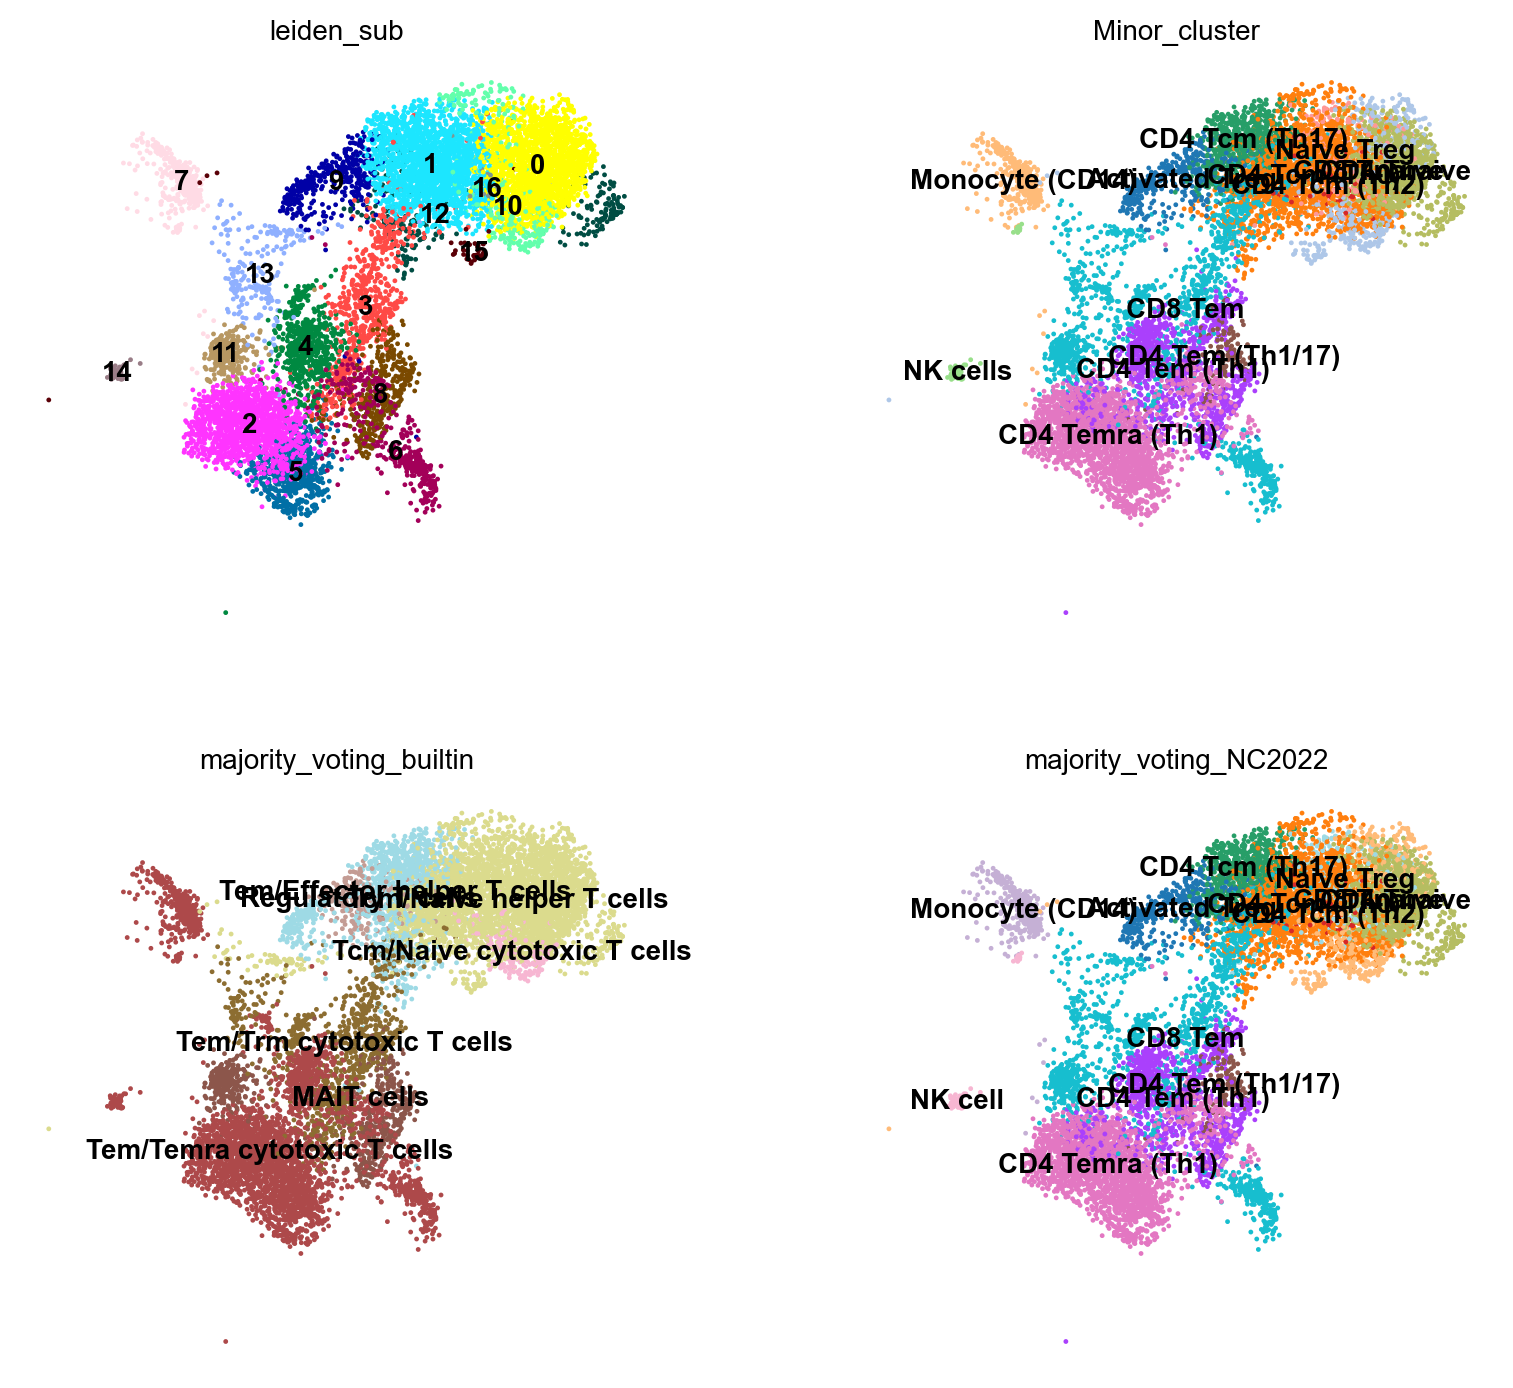

In [23]:
adata_MC_T.obs['Minor_cluster'] = adata_MC_T.obs['majority_voting_NC2022'].copy()

mapping = {
        'Monocyte (CD14': 'Monocytes 1',
        'NK cell': 'NK cells',
    }
adata_MC_T.obs['Minor_cluster'] = adata_MC_T.obs['Minor_cluster'].replace(mapping)

sc.pl.umap(adata_MC_T, color=['leiden_sub', 'Minor_cluster', 'majority_voting_builtin', 'majority_voting_NC2022'], ncols=2, legend_loc = 'on data')

categories: Activated Treg, CD4 Tcm (Th0), CD4 Tcm (Th17), etc.
var_group_labels: CD8 Tnaive, CD8 Tem, CD8 Trm, etc.


c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


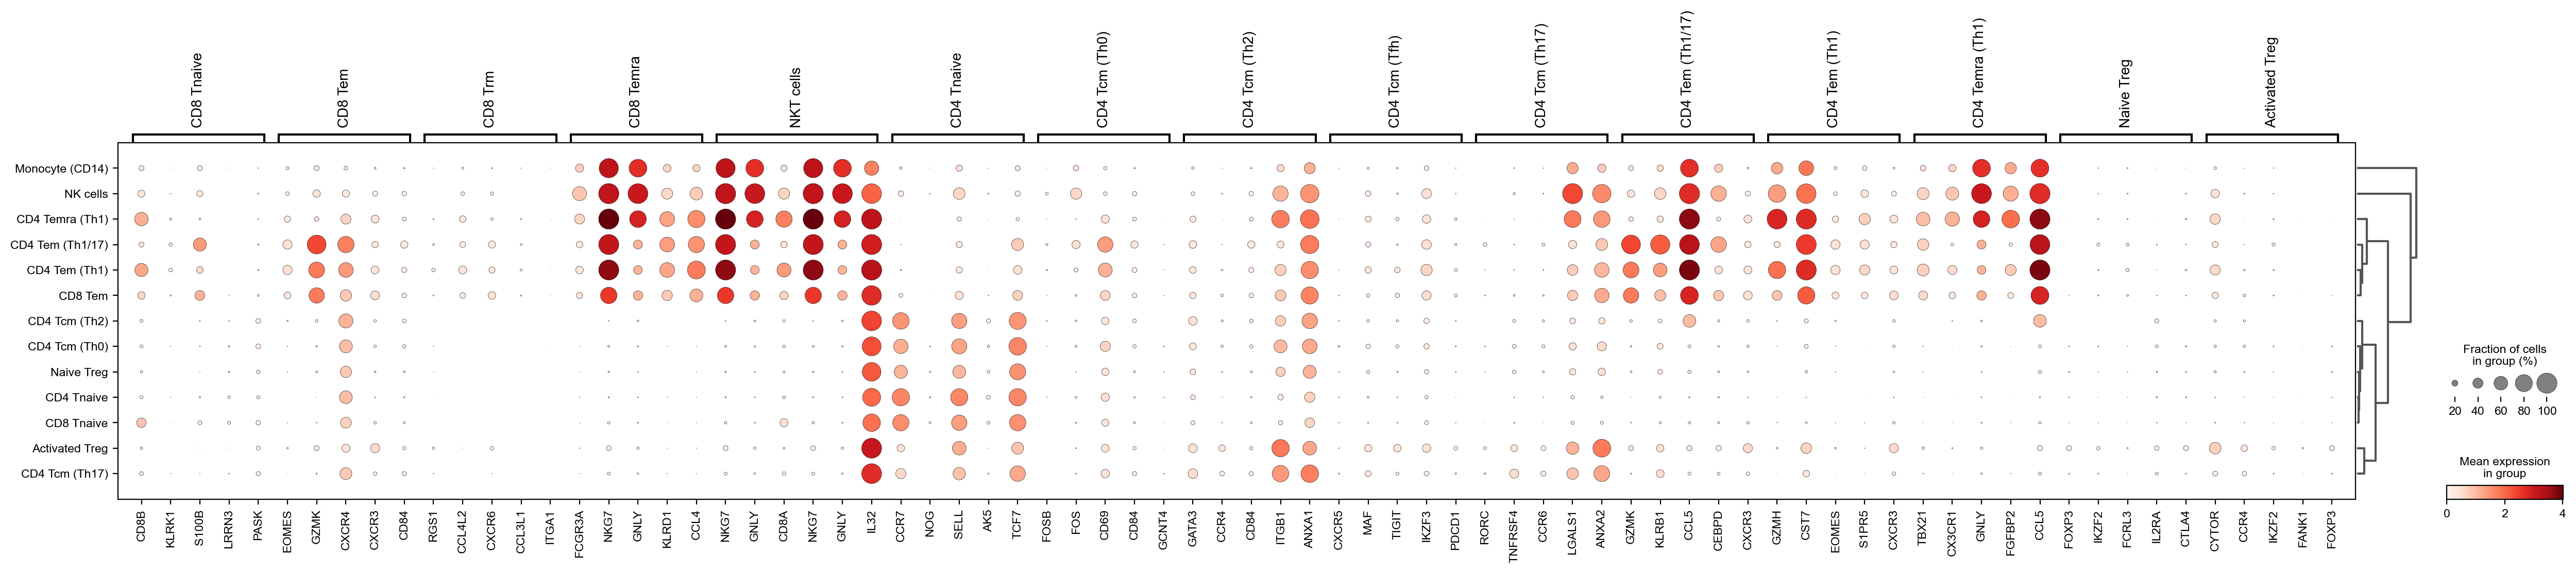

In [24]:
# T NC2022 version

sc.set_figure_params(dpi=100, color_map = 'viridis_r', fontsize=10, transparent=False, frameon=False)

marker_genes_dict = {

    'CD8 Tnaive':	['CD8B', 'KLRK1', 'S100B', 'LRRN3', 'PASK'],
    'CD8 Tem':	['EOMES', 'GZMK', 'CXCR4', 'CXCR3', 'CD84'],
    'CD8 Trm':	['RGS1', 'CCL4L2', 'CXCR6', 'CCL3L1', 'ITGA1'],
    'CD8 Temra':	['FCGR3A', 'NKG7', 'GNLY', 'KLRD1', 'CCL4'],
    'NKT cells': ['NKG7', 'GNLY', 'CD8A', 'NKG7', 'GNLY', 'IL32'],
    'CD4 Tnaive':	['CCR7',	'NOG',	'SELL',	'AK5',	'TCF7'],
    'CD4 Tcm (Th0)':	['FOSB',	'FOS',	'CD69',	'CD84',	'GCNT4'],
    'CD4 Tcm (Th2)':	['GATA3',	'CCR4',	'CD84',	'ITGB1',	'ANXA1'],
    'CD4 Tcm (Tfh)':	['CXCR5',	'MAF',	'TIGIT',	'IKZF3',	'PDCD1'],
    'CD4 Tcm (Th17)':	['RORC',	'TNFRSF4',	'CCR6',	'LGALS1',	'ANXA2'],
    'CD4 Tem (Th1/17)':	['GZMK',	'KLRB1',	'CCL5',	'CEBPD',	'CXCR3'],
    'CD4 Tem (Th1)':	['GZMH',	'CST7',	'EOMES',	'S1PR5',	'CXCR3'],
    'CD4 Temra (Th1)':	['TBX21',	'CX3CR1',	'GNLY',	'FGFBP2',	'CCL5'],
    'Naive Treg':	['FOXP3',	'IKZF2',	'FCRL3',	'IL2RA',	'CTLA4'],
    'Activated Treg':	['CYTOR',	'CCR4',	'IKZF2',	'FANK1',	'FOXP3'],
}

sc.tl.dendrogram(adata_MC_T,  groupby='Minor_cluster')
sc.pl.dotplot(adata_MC_T, marker_genes_dict, groupby='Minor_cluster', dendrogram=True, save='huan T marker gene NC ')

In [25]:
adata_MC_T.obs.to_csv('adata_MC_T.obs.csv')

# B sub-clustering

In [3]:
adata_MC_B = adata_MC[adata_MC.obs['Major_cluster'].isin(['B cells'])]
adata_MC_B

View of AnnData object with n_obs × n_vars = 1272 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Minor_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spliced', 'uns

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\tools\_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parame

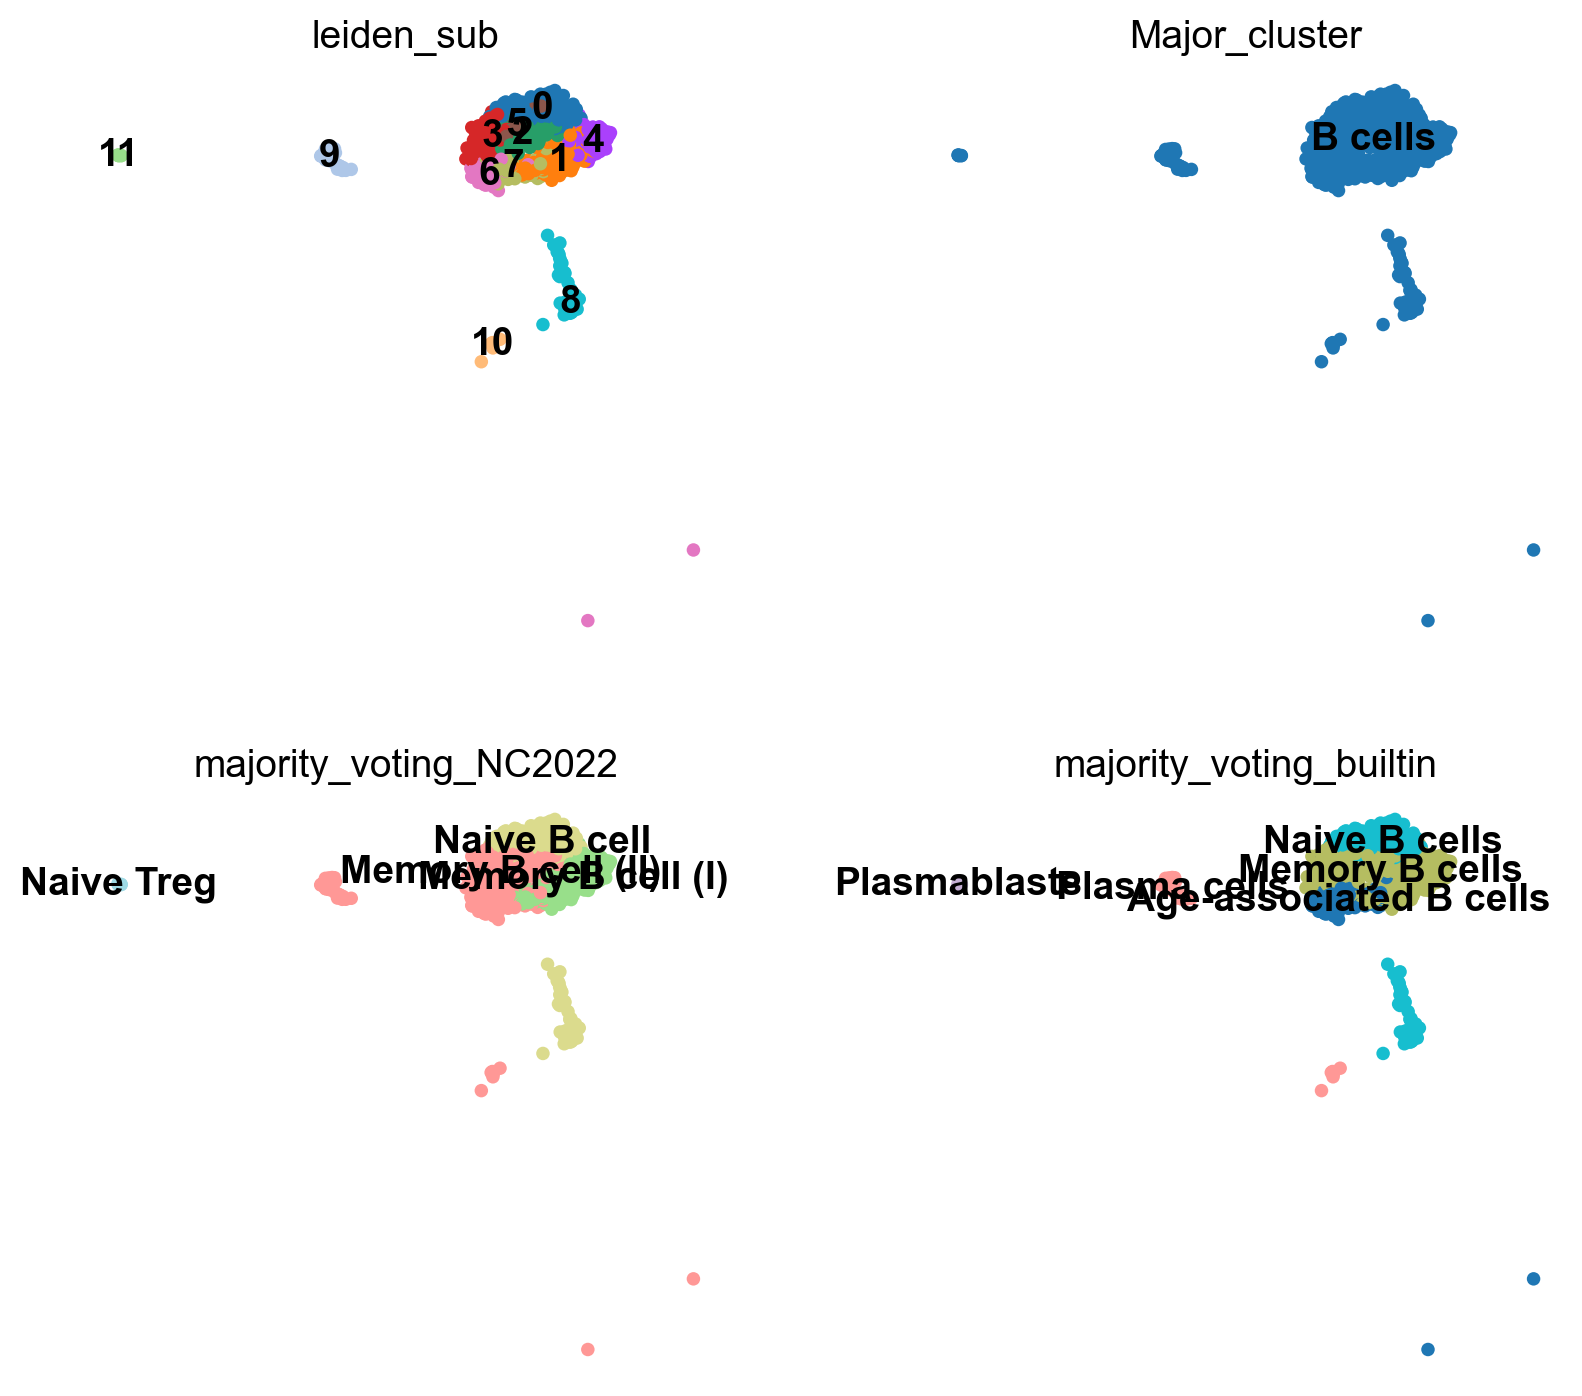

In [4]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)

sc.tl.leiden(adata_MC_B, key_added = "leiden_sub", resolution=1) 
sc.pl.umap(adata_MC_B, color=['leiden_sub', 'Major_cluster', 'majority_voting_NC2022', 'majority_voting_builtin'], ncols=2, legend_loc = 'on data')

In [6]:
adata_MC_B.obs['Minor_cluster'] = adata_MC_B.obs['majority_voting_builtin']
adata_MC_B.obs['Minor_cluster'] = adata_MC_B.obs['Minor_cluster'].replace('Plasmablasts', 'Plasma cells')

categories: Age-associated B cells, Memory B cells, Naive B cells, etc.
var_group_labels: Age-associated B, Memory B, Naive B, etc.


c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


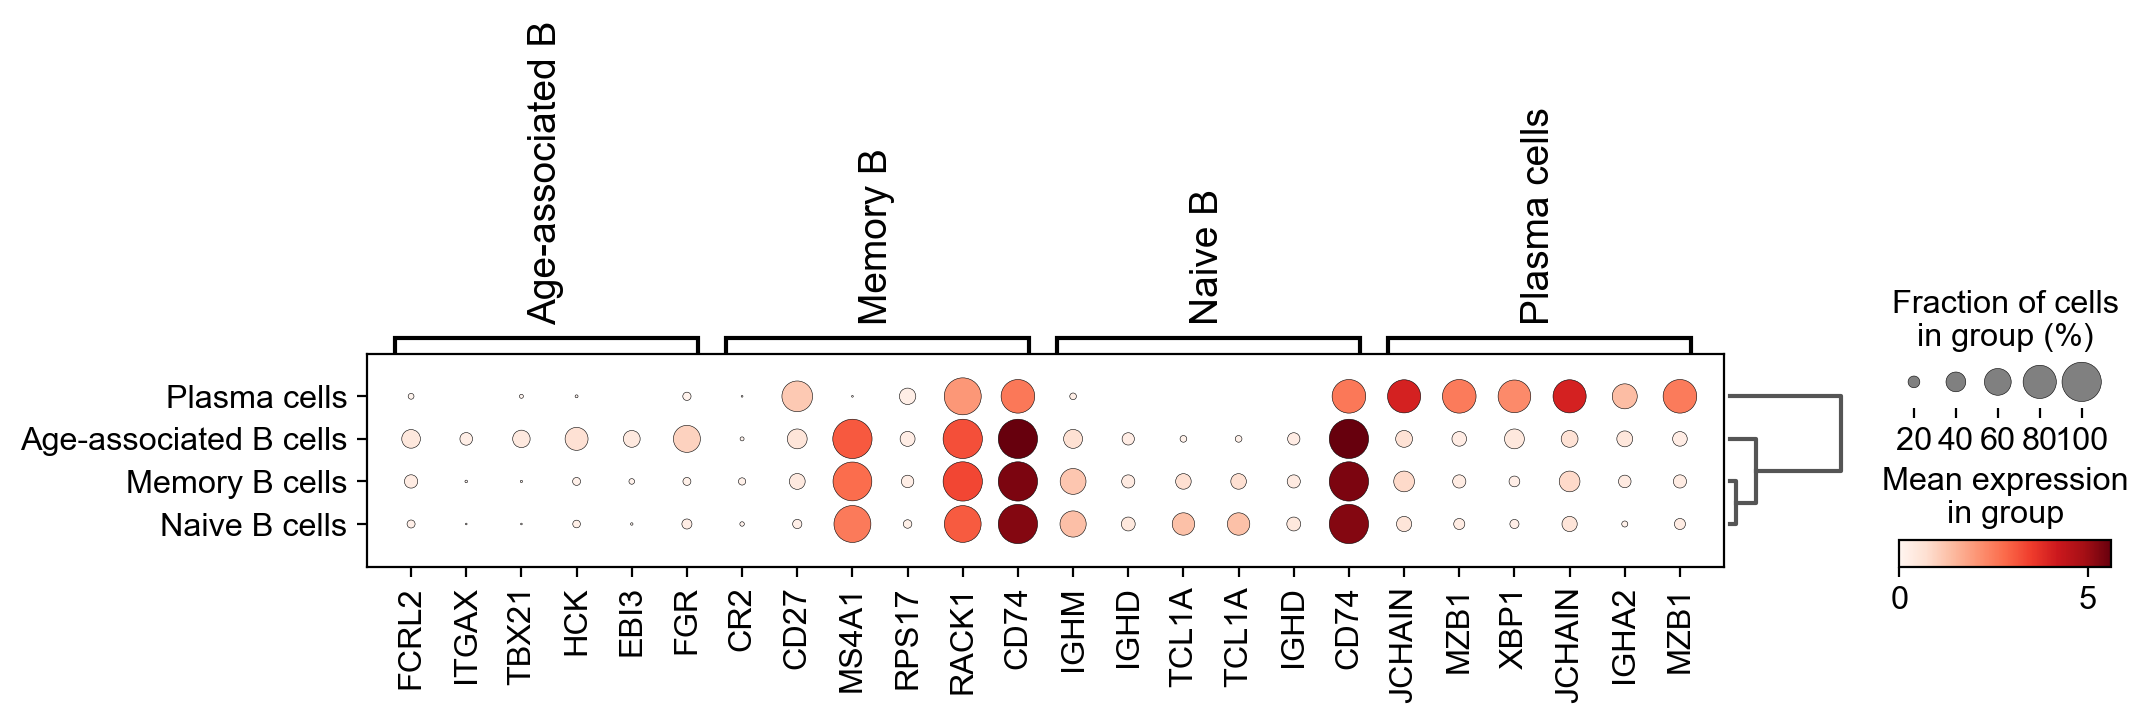

In [7]:
# T NC2022 version

sc.tl.dendrogram(adata_MC_B, groupby='leiden_sub')

marker_genes_dict = {

    'Age-associated B': ['FCRL2', 'ITGAX',  'TBX21', 'HCK', 'EBI3', 'FGR'],
    'Memory B': ['CR2', 'CD27', 'MS4A1', 'RPS17', 'RACK1', 'CD74'],
    'Naive B':	['IGHM', 'IGHD', 'TCL1A', 'TCL1A', 'IGHD', 'CD74'],
    'Plasma cells':	['JCHAIN', 'MZB1', 'XBP1', 'JCHAIN', 'IGHA2', 'MZB1'],
    
}

sc.tl.dendrogram(adata_MC_B, groupby='Minor_cluster')
sc.pl.dotplot(adata_MC_B, marker_genes_dict, groupby='Minor_cluster', dendrogram=True, save='huan T marker gene NC ')

In [8]:
adata_MC_B.obs['Minor_cluster'].unique().tolist()

['Naive B cells', 'Plasma cells', 'Memory B cells', 'Age-associated B cells']

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


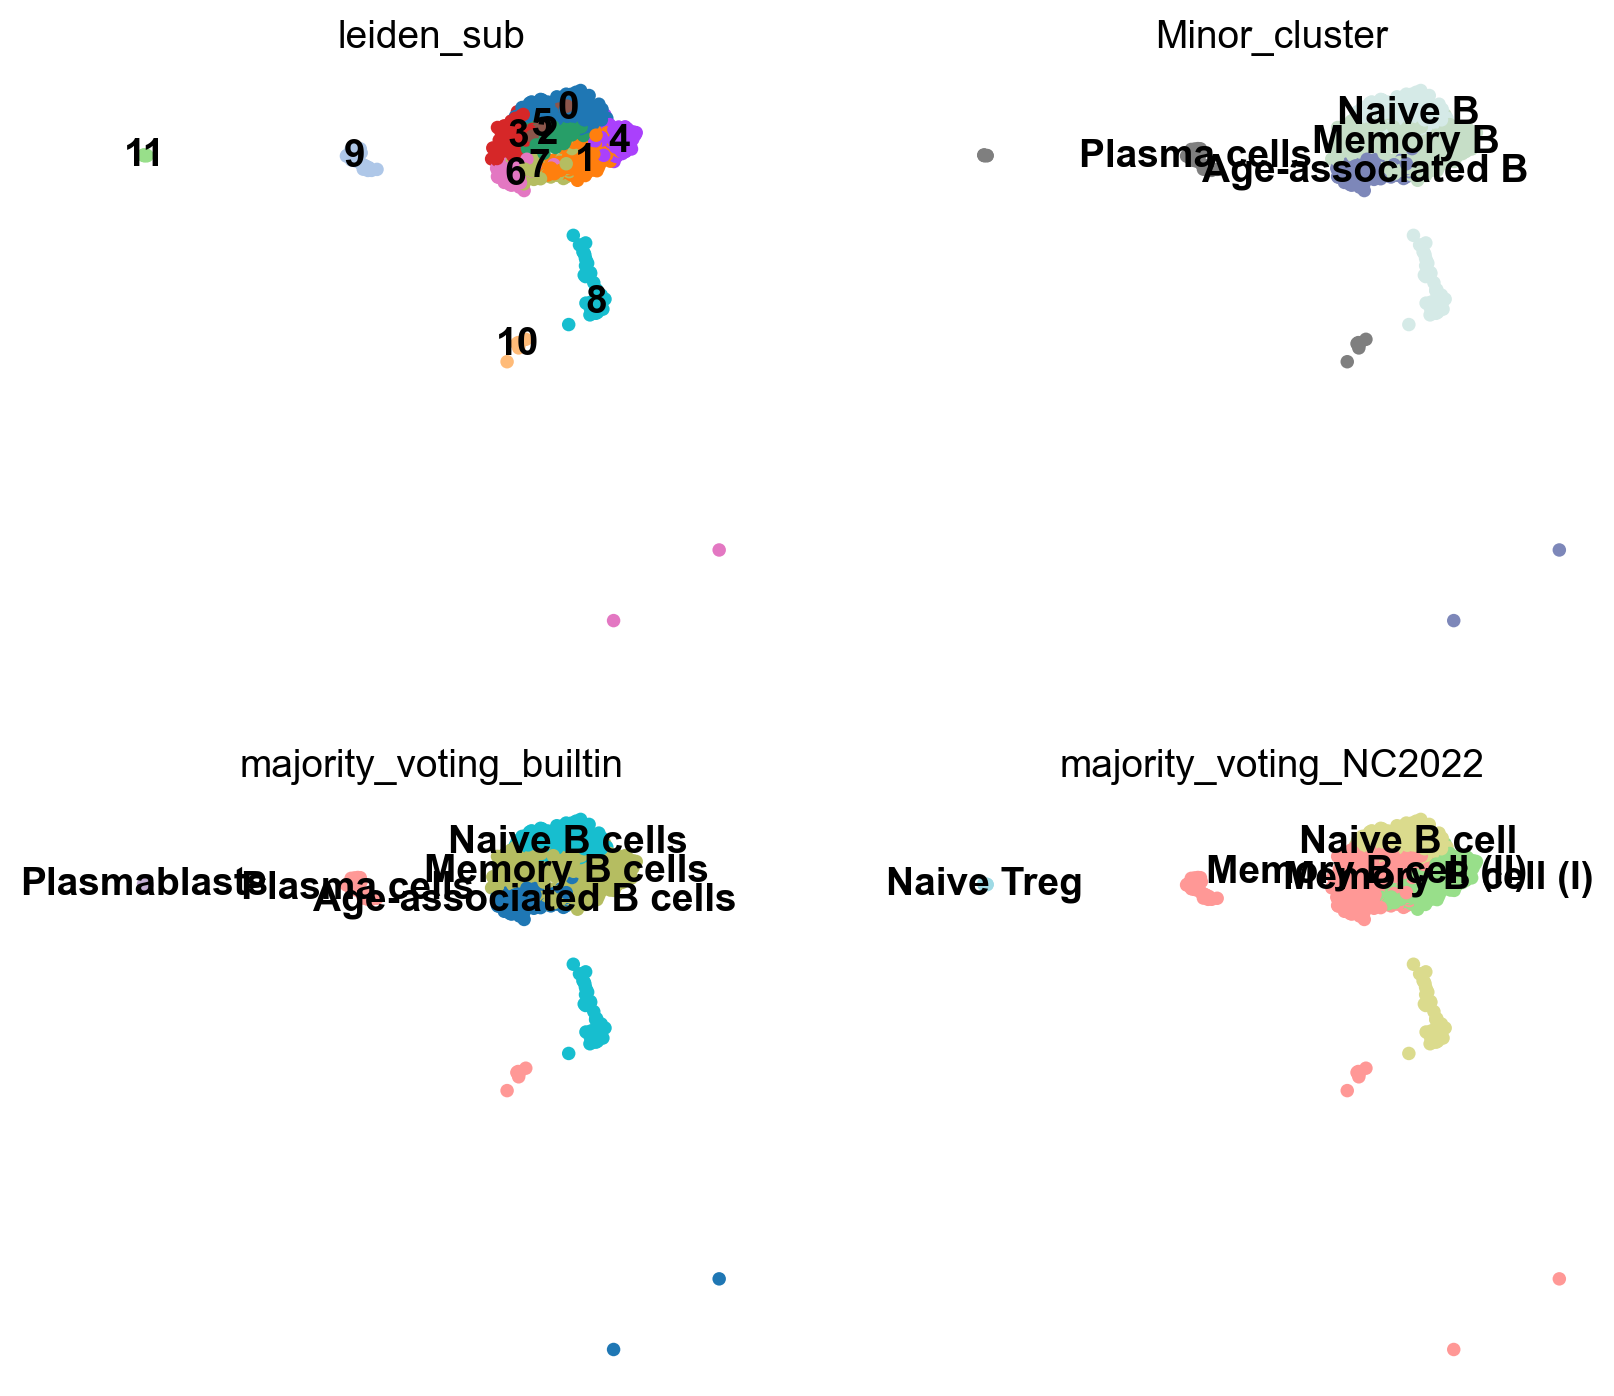

In [9]:
mapping = {
        'Naive B cells': 'Naive B',
        'Plasma cells': 'Plasma cells',
        'Memory B cells':'Memory B',
        'Age-associated B cells':'Age-associated B',
        'Plasmablasts':'Plasmablasts'
    }
adata_MC_B.obs['Minor_cluster'] = adata_MC_B.obs['Minor_cluster'].map(mapping)

sc.pl.umap(adata_MC_B, color=['leiden_sub', 'Minor_cluster', 'majority_voting_builtin', 'majority_voting_NC2022'], ncols=2, legend_loc = 'on data')


In [23]:
adata_MC_B.obs.to_csv('adata_MC_B.obs.csv')